# Bird Taxa  
W.P.G.Peterson

### Summary
Unlike the taxonomies of other animals, phylogenetic trees of birds give a designed order to species within a genus; species are ordered from "least-derived" to "most derived." The simple way to envision this: the "most-derived" is the species which split from the evolutionary-tree most recently, and, conversely, the "least-derived" species split earliest (compared to the other species in the Genus.)  

Functionally, these rankings are determined via branch-lengths in the phylogenetic tree. The branch-lengths are determined through molecular and genetic analysis. The specifics of molecular and genetic analysis are well beyond the scope of this investigation, however, their complexity points to a couple of assumptions:  

- For the purposes of this work, I have interpreted the division of species to be fairly complete and accurate. From my (limited) understanding, the current state of our knowledge suggests that when something is defined as "a species" there is solid rationale for that definition. Changes are occuring with the promotion/demotion of subspecies/species, but there is greater consistency than change.  


- The division of genera, I have interpreted to be - and recognized indications of being - more arbitrary.  

Consider chairs and desks. Both are useful categories for thought and discussion. Consider the chair with attached writing surface seen in classrooms and auditoriums. That chair/desk is clearly a unique "species" but does not quite fit into either genera of chair or desk. The grouping of individual types into categories is clearly useful, but not always straightforward.  


Given that the phylogeny of birds offers an order to species within each genus, there is an opportunity to look more closely at the structure of our beliefs.  

I pursue this primarily in two ways:  

First: Look at the relationship between the species ranking within a genus (least-to-most derived, from now on referred to as "Rank" or "Sequence Rank", with 1 denoting the least-derived and "highest" rank) and the order in which species were first described ( from now own referred to as "Date Rank", again, "highest" rank is 1, which would be the first described species.  

Second: Look at the relationship between the distributions of species per genus, species described per author, and genera described per author.

### The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import pickle
with open('df.pickle', 'rb') as f: # Pickle file created by running code in Data.py
        df = pickle.load(f) 
df.head()

,Rank,Order,Family,Genus,Species,BreedRegion,OrigG,SDate,SAuthors,GDate,GAuthors,DateRank,SpG,Type
0,1,STRUTHIONIFORMES,Struthionidae,Struthio,camelus,AF,True,1758,[linnaeus],1758,[linnaeus],1,2,True
1,2,STRUTHIONIFORMES,Struthionidae,Struthio,molybdophanes,AF,True,1883,[reichenow],1758,[linnaeus],2,2,False
2,1,RHEIFORMES,Rheidae,Rhea,americana,SA,False,1758,[linnaeus],1760,[brisson],1,2,True
3,2,RHEIFORMES,Rheidae,Rhea,pennata,SA,True,1834,[d'orbigny],1760,[brisson],2,2,False
4,1,APTERYGIFORMES,Apterygidae,Apteryx,australis,AU,True,1813,[shaw],1813,[shaw],1,5,True


The collected data contains the the following information. All taken from the **IOC's 8.1** bird list accessed from http://www.worldbirdnames.org/master_ioc-names_xml.xml.  

Scraping occured with a simple request, and tabularization occured with Beautiful Soup. Data processing information can be found in `Data.py`

1. "Rank" - maybe better called "Sequence" - the order in which the species appears in the IOC's 8.1 list. This rank/sequence is supposed to start with the "least derived" species in the Genus, and end with the "most derived" species in the Genus.  
2. "Order" - Order to which the species belongs  
3. "Family" - Family to which the species belongs  
4. "Genus" - Genus to which the species belongs  
5. "Species" - specific epithet  
6. "BreedRegion" - Part of the world in which the species is known to breed  
7. "OrigG" - Whether or not the species is currently part of the Genus in which it was first described  
8. "SDate" - The date of first description of the species
9. "SDate" - A list of the authors credited with the species description  
10. "GDate" - The date of description for the Genus  
11. "GAuthors" - A list of the authors credited with the Genus description  
12. "DateRank" - The order in which the species was described (calculated from "SDate"). In the event of a tie, both species are awarded the higher rank. E.G. 1,2,3,3,5  
13. "SpG" - The number of species per Genus  
14. "Type" - Indicates whether or not the species was designated a 'type species' in the IOC's 7.3 list - Information provided by Dr. Alan Peterson, webmaster at www.zoonomen.net

SpG, is a calculated variable.  
Author parsing posed the greatest problem in preprocessing. Some authors have long names, some have intials. But still relatively straightforward. Crossreferenced www.zoonomen.net.

*A notable omission from this **collected** data is subspecies information. The IOC includes subspecies information*

### Comparing Rank and Date Rank

My understanding of the ranking of species is that, from a biologial standpoint, in a genus with 4 species, the \#2 and \#3 species should be the same "distance" apart as the \#45 and \#46 species in a genus with 50 species. Thus, the Rank information can reasonably treated as "interval" data.  

The Date Rank information does not adhere to the same structure, as the first described species and the second described species *in no way* have the same implicit relationship as the 30th and 31st described species of a genus. However, as this was a fairly late understanding, it was not incorperated into my work.  

In comparing Rank and Date Rank information my aim was to describe the relationship between the two. It appears quite clear that there is a relationship. This proposes two interpretations:  

First: Imagine that species Rank is as much - if not more - human prejudice as it is science. What do the circumstances of description (date, author, etc.) tell us about how we Rank that species?  

Second: Imagine that our science is very good and we have (with negligible errors) correctly identified the the Rank of all species. What does this tell us about how we, as humans, encounter and describe the natural world as indicated by the circumstances of description?  

Doubtless truth lies in the middle.  

### A Quick Look at Some Distributions

*This distribution of SpG is misleading as species rather than genera are being counted* 

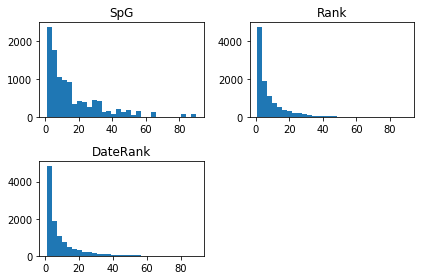

In [44]:
plt.figure(figsize = (6,4));i = 0
for c in ['SpG', 'Rank','DateRank']:
    i+=1
    plt.subplot(2,2,i); plt.title(c)
    plt.hist(df[c], bins = 30)
plt.tight_layout()

Below is the actual distribution of genera at every species per Genus level.

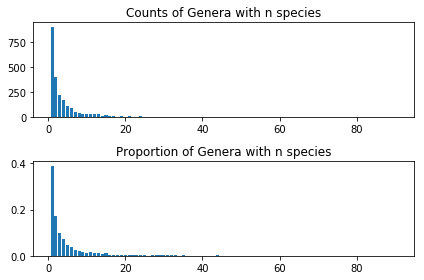

In [148]:
dat = df['SpG'].value_counts().sort_index() / df['SpG'].value_counts().sort_index().index

plt.subplot(211)
plt.bar(dat.index, dat)
plt.title('Counts of Genera with n species')

plt.subplot(212)
plt.bar(dat.index, dat / dat.sum())
plt.title('Proportion of Genera with n species')

plt.tight_layout()

### Generating uniform "expectations"

The above distributions start to give an idea of the "count" of species at each Rank and each Date Rank. By performing a simple "groupby" in pandas, the number of species at each (Rank, DateRank) pair was attained.  

The more involved process was generating an "expectation" at for each of those (Rank, DateRank) pairs. I mainly focused on the expectations of species observed at each rank. Thus, to create a uniform expectation I simply took the total number of taxa at a particular *DateRank* and divided by the number of species per genus. Thus, if, for example 8 taxa were observed with DateRank one in a genera with four species per genus, a uniform distribution suggest 2 would be expected at each Rank.  

In a slightly less trivial example, if 15 taxa are observed with DateRank 2 in genera with 60 species per genus, the uniform distribution generates an expectation of .25 taxa at each Rank.  

In this manner, counts, expectations, z-scores, and p-values can be calculated 

### Mitigating issues arising from the distribution of the data  

As is obvious, the data follows a logrithmic / "hollow-curve" distribution.  

While from a biological standpoint the "distance" between any two consecutively-ranked species might be the same, from a practical standpoint, most species are ranked 1, 2, or 3, and very few are ranked 60,61,62 [highest SpG and thus Rank is 90]. Thus, in comparing Rank and Date Rank, I took a couple of approaches:  

First, only look at species of Rank or Date Rank less than ten.  
In particular this was my strategy in exploratory and descriptive analysis. Beyond Rank or Date Rank of only four or five, distributions start to break down into the noise of small numbers.  

Second, experiment with transformations.  
This I only performed on the "Rank" variable. The first, (and obvious) choice is a log transformation. A second strategy I used was normalization, which is to say (Rank - 1 )/ (SpG-1), such that each rank is converted to a value between 1 and 0. From a theoretical point of view I leaned toward the log-transformation due to the fact it preserved much of the "interval" nature of the information while diminishing the impact of those high SpG genera on the loss functions for our modeling techniques.

### Modeling techniques  

The goal here was not one of prediction, but rather one of description: How much information is contained in this data? What might be implied or inferred by the data?  

As such, I only used "interpretable" modeling techniques of linear models and decision trees. Linear models did not produce much in the way of useful results, and decision trees needed to be closely watched so as to not over-fit to those high SpG genera.  

One of the issues is that of determining a baseline.  

For untransformed data, the naieve "guess" would be the mean of all ranks, or, more simply, (1+n)/2. For log-transformed data, it is simply ln((1+n)/2).  Finally for the standardized data, the guess is .5.  Resulting "baseline" scores for MSE and $R^2$ can be found in code.

### Comparison of SpG, species per author, and genera per author  

Comparing Rank to Date Rank information suggested an underlying relationship between the order of description and our phylogenetic ordering. However, this relationship probably doesn't indicate much about the ranking of the species, or even the order of description. Instead, it probably stems from the process by which species are split into genera.
  

Genera grouping are arbitrary in so much as they represent our best effort to create groupings. The number of species or genera described by each author are true observations / distributions (some noise may be introduced by multiple-author descriptions). Usefully the unit of count between the distributions (species) remains the same.  

In performing visual analysis I aimed to describe the differences and similarities between the distributions.  

Each of the three distributions appear to follow a "hollow-curve." However, the SpG curve is pushed out a little from the origin.  

Particularly when the distribtions are visualized in a manner that highlights the relative contribution to species total from each grouping level (e.g. what percent of species are found in genera with one species vs. what percent of species were described by author who only described a single species) marked differences begin to appear. That slight "pushing out" from the origin in the SpG curve as compared to the SpA and GpA curves indicates a much higher proportion of species residing in genera with low numbers of species as compared to species coming from authors with low description totals.  

In Dr. Peterson's discussions with Ernst Mayr, Mayr suggested that speciation occured via two processes; splitting and diverging. Additionally, those two processes are different. Thus I made an attempt to parameterize the "hollow-curve" with a random-uniform liklihood of spliting, and a normally-distributed diverging term. No successful approximation was possible. The goal was to find a (splitting, diverging) parameterization which could then be used to describe the difference between the SpG and SpA curves.

*Much thanks to the resources located at www.WorldBirdnames.org; www.zoonomen.net and Dr. Alan Peterson*